# Week 4 : Lab 
 ## Data structures: Lists, sorting and tuples
 ##### CS1P - University of Glasgow - John H. Williamson - 2019/2020 -- Python 3.x


## Lab exercise

**You must submit a reasonble attempt at this exercise to gain a tick for this work**.

<font color="red"> Remember to save your work frequently! </font>



## Purpose of this lab

This lab will get you up to speed on using lists in Python programs, including joining lists, removing and adding elements, copying lists, sorting and shuffling. You will need to synthesise the ideas from the lecture into some  larger problems.



## Before the lab
* Attempt at least the A exercises.

### If you're confused about tuples:
* Read the blog article [lists versus tuples](http://nedbatchelder.com/blog/201608/lists_vs_tuples.html) by Ned Batchelder.


In [9]:
from utils.tick import tick

## A: Quick problems
These should take around 5 minutes each.

### A.1 Simple list operations
You are given three lists `x,y,z`.

Write code that will:
* join the lists into one list in the order `z,x,y`, 
* *then* remove the 3rd element of this new list.
* and store the result in a variable `zxy`. 
* then create a *copy* of `zxy` and call it `zxy_copy`. 
* Append the string `"in the sunshine"` to the end of `zxy_copy`.

In [10]:
# These are the lists you are given
x = [1,2,3]
y = [0,0,0]
z = [1,9,6,9]

In [11]:
# Solution goes here
new_list = z+x+y
new_list.pop(2)
zxy = new_list
zxy_copy = zxy[:]
zxy_copy.append("in the sunshine")

In [12]:
## Test (make sure your variable is called zxy!)
with tick():
    assert zxy == [1, 9, 9, 1, 2, 3, 0, 0, 0]
    assert zxy_copy == [1, 9, 9, 1, 2, 3, 0, 0, 0, "in the sunshine"]
    assert zxy is not zxy_copy

### A.2 Colours
**Without using a loop**, using the following definition of **colours**, define variables that compute the following via *list slicing or indexing*:

1. `first` The first element of  `colours` (this one is provided for you)
1. `last` The last element of `colours`
1. `even` Every even element of `colours` (i.e. elements with even indices)
1. `odd` Every odd element of `colours`
1. `three_six` The third to the sixth element of `colours`, inclusive 
1. `last_five` The last five elements of colours
1. `rev_third` Every third element of the first eight elements of `colours`, in reverse order (starting with the eighth element).


In [13]:
colours = ["red", "black", "orange", "yellow", 
           "blue", "cyan", "green", "purple", "gray", "white"]

In [14]:
first = colours[0]
# last = ...

In [15]:
# Solution goes here
first = colours[0]
last = colours[-1]
even = colours[::2]
odd = colours[1::2]
three_six = colours[2:6]
last_five = colours[-5:]
rev_third = colours[7::-3]

In [16]:
with tick():
    assert first == 'red'
    assert last == 'white'
    assert even == ['red', 'orange', 'blue', 'green', 'gray']
    assert odd == ['black', 'yellow', 'cyan', 'purple', 'white']
    assert three_six == ['orange', 'yellow', 'blue', 'cyan']
    assert last_five == ['cyan', 'green', 'purple', 'gray', 'white']
    assert rev_third == ['purple', 'blue', 'black']

### A.3 Joining and removing
Write a function `unique_elts()` that takes two lists, and returns a new list with the elements that appeared in *only one of the lists* (i.e. remove items that appeared in both lists).

Remember you can do membership tests using `in`.

In [17]:
# Solution goes here
def unique_elts(a, b):
    new_list = []
    for i in a:
        if not (i in b):      
            new_list.append(i)
    for i in b:
        if not (i in a):      
            new_list.append(i)
    return new_list

In [18]:
## Tests
## If you run this cell, it should print "All OK"
## Otherwise, you'll see which of the lines caused the problem
with tick():
    assert unique_elts([1, 2, 3], [2, 3]) == [1]
    assert unique_elts(["five"], ["five"]) == []
    assert unique_elts([], [1, 2, 3]) == [1, 2, 3]
    assert unique_elts(["a", "b", "c"], [1, 2, 3]) == ["a", "b", "c", 1, 2, 3]

### A.4 Nesting
Write a function `nest(x,n)` which takes a value `x` and a number `n` and puts the value `x` inside a list, then puts that list inside a list, and so on, up to `n` levels, for any non-negative `n`. Putting one list inside another is called **nesting**.

For example:

    nest("hello", 0)  = "hello"     # n=0 does nothing
    nest("hello", 1)  = ["hello"]   # n=1 puts it in a list
    nest("hello", 4)  = [[[["hello"]]]] # n=4 puts inside a list inside a list inside ...
        

In [19]:
# Solution goes here
def nest(x,n):
    for i in range(n):
        x = [x]
    return x

In [20]:
## Tests
with tick():
    assert nest("hello", 0) == "hello"
    assert nest("hello", 1) == ["hello"]
    assert nest("hello", 5) == [[[[["hello"]]]]]

## A.4 (b)
Copy the function above in the cell below, and extend your `nest` function to *also* take *negative* values. If a negative value is provided, the value should be *unnested* one level (you may assume the list contains only one item). If a positive value is provided `nest` should work as before.


    nest([["hello"]], -2) = "hello" # remove two levels
    nest([["hello"]], -1) = ["hello"] # remove one level
    nest("hello", 0)  = "hello"     # n=0 does nothing
    nest("hello", 1)  = ["hello"]   # n=1 puts it in a list
    nest("hello", 4)  = [[[["hello"]]]] # n=4 puts inside a list inside a list inside ...


In [21]:
# Solution goes here
def nest(x,n):
    if n >= 0:
        for i in range(n):
            x = [x]
    else:
        for i in range(-n):
            x = x[0]
    return x

In [22]:
## Tests
with tick():
    assert nest([[["hello"]]], -3) == "hello"
    assert nest([[["hello"]]], -1) == [["hello"]]
    assert nest(["hello"], -1) == "hello"
    assert nest("hello", 0) == "hello"
    assert nest("hello", 1) == ["hello"]
    assert nest("hello", 5) == [[[[["hello"]]]]]

### A.5 Adding the length
Write a function `add_length(l)` which takes a list `l` and then appends the length of the list as the last element. **Don't use a return statement to return the list**. 

Think about what being able to change a list **in place** means about transferring values from functions back into the calling code.

Check that your function does what you think it does.


In [23]:
# Solution goes here
def add_length(l):
    l.append(len(l))

In [24]:
# this will work.
x = ["a", "b", "c"]
add_length(x)
print(x)

# Question: why doesn't this work?
print(add_length([1,2,3]))

['a', 'b', 'c', 3]
None


In [25]:
## Tests
with tick():
    l = [1, 2, 3]
    assert add_length(l) == None
    assert l == [1, 2, 3, 3]
    add_length(l)
    assert l == [1, 2, 3, 3, 4]
    l = []
    add_length(l)
    assert l == [0]

## A.6 Queues
The following code creates four functions that generate fragments of sentences when they are called. However, each time they are called, they may or may not produce another fragment, randomly. 

An attempt has been made to join these into a coherent sentence by joining strings together but it does not work properly and generates random incomplete fragments, like below:

        sank.

        expired.
        A smooth flopped.
        The sank.
        A howling froze.
        A guarded railed.
        A ball
        A minister expired.
        smooth clown

Write a function `assemble_sentence()` that uses **four queues, held inside another list** that will reconstruct sentences in a readable order. Every call to the function should return one completed sentence.

The following, incorrect, solution is provided as a basis.



In [26]:
# Do not modify this code
# which creates the sentence generators
import random

def mk_generator(messages):    
    def new_word():        
        if random.random()<0.5:
            return random.choice(messages)
    return new_word
    
generators = [mk_generator(["The", "A"]), 
              mk_generator(["large", "howling", "smooth", "guarded", "monstrous", "viable"]),
              mk_generator(["clown", "minister", "ball", "tooth", "wall", "cloth"]),
              mk_generator( ["froze.", "sank.", "ran.", "failed.", "flopped.", "railed.", "expired."])]

In [27]:
# Correct and modify this code to use four queues
# This version doesn't work right. It generates 
# partial sentence fragments
def assemble_sentence(generators):                
        result = []        
        for i in range(4):
            fragment = generators[i]()            
            if fragment is not None:
                result.append(fragment)
                
        # joins together the strings in a list
        # into one string
        return  " ".join(result)

random.seed(2019)
for i in range(10):
    print(assemble_sentence(generators))

railed.
A
wall railed.
The clown ran.
The sank.
A howling railed.
A viable tooth failed.
A ball
A minister railed.
howling railed.


In [28]:
# Solution goes here
def assemble_sentence(generators):  
        result = []        
        for i in range(4):
            fragment = None
            while fragment == None:
                fragment = generators[i]() 
                if fragment is not None:
                    result.append(fragment)
        # joins together the strings in a list
        # into one string
        return  " ".join(result)

random.seed(2019)
for i in range(10):
    print(assemble_sentence(generators))

The monstrous cloth froze.
The smooth minister sank.
A howling cloth failed.
A guarded wall expired.
A smooth minister railed.
The viable cloth expired.
The viable cloth ran.
A smooth ball sank.
A smooth clown railed.
The monstrous clown froze.


In [29]:
with tick():
    for i in range(10):
        sentence = assemble_sentence(generators)
        assert sentence[0]==sentence[0].upper()
        assert sentence[-1]=='.'
        assert len(sentence.split())==4


--------------
## B: List Problems
These should take 30-45 minutes each.

### A slightly dodgy new startup: <font color="green"> myshopfastr.com </font>
You're writing an app to help people shop more efficiently in the supermarket (for people who still go to physical shops).
There are several bits of functionality to implement: the ability to search for items easily (e.g. `celery` might return `Sainsbury's Organic Celery 100g, ...`) and the ability to show the user results as a list of options:

     Name                       Price  Weight Price/100g Aisle
     ----------------------------------------------------------
     Sainsbury's Organic Celery 100g, £2.99, 100g, £0.30, B3
     Sainsbury's Celery 100g, £1.99, 100g, £0.20, A1
     Sainsbury's Basic Celery 50g, £0.39, 50g, £0.08, A1
     Sainsbury's Extremely Basic Celery, £0.10, 50g, £0.02, A4     
     ...
     

Once you have this working, you also need to convince investors that your design choices are making the app better.     

-------------     

### B.1: Stopping and stemming
Search engines like Google often need to "clean up" search queries (the query is the thing you type into a search box) before trying to find terms (words) in documents. The same idea applies to online shopping. Queries might come in like "I want celery please". This should be trimmed down to just "celery" to do the searching against products.

For example `"what is the fastest python list iterator"` might be transformed into keywords `["python", "list", "fast", "iterator"]`. In our shopping example, we'd like users who think the computer is a person and type in things like `find me the apples` to be transformed to `["apple"]`, removing the extraneous parts of the search query.

There are two parts to this: 
* **stopword** removal, which removes short, uninformative words like "the" and "and"; 
* and **stemming** which removes common endings like "ing" and "s" to find the basic form of a word. Here we'll "stem" by just chopping off any bits of words that match common endings.

For this problem, you need to write a bit of code to first remove **stopwords** and then **stem** the remaining words. Try getting the stopword removal working first, then go on to the stemming.

Steps:
1. Create your *own list* of common stop words (e.g. ["and", "to", "the", ...]). Stuck? You can use some or all of [this list](https://www.ranks.nl/stopwords)
2. Create your *own list* of common English endings (e.g. ["ing", "ings", "s", "er", "tion"]). Can't think of any? [this list](https://www.thoughtco.com/common-suffixes-in-english-1692725) has some you could include (they might not all be suitable).
3. Get user input with `input()`.
4. Split the input into words. You can use `my_string.split()` to split a string `my_list` up into a list of individual words, splitting by spaces. (see the example below)
5. Remove all of the words in the stopwords from the user input.
6. For each word, test if the word ends in one of the common endings, and if it does, remove the ending.  (see the example below on how to use `.endswith()`)
7. Print out the cleaned up search terms.

Note that you can use `.endswith()` on a string to test if the string ends with those characters. You can join a list of strings back together using `join()`, but the syntax is slightly unexpected: see below for how to use it.

**Note that the rules to make stemming really work well for English are annoyingly complicated. Don't worry if your simple stemmer doesn't do a very sensible job (e.g. "Sting" becomes "St"!)**

Read the  code examples below to see how to use the string functions mentioned above.

In [30]:
# an endswith() example
# simply returns True if the string ends with the given string
# unsuprisingly, there is a .startswith() as well.
print("running".endswith("ing"))
print("running".endswith("tion"))

True
False


In [31]:
# how split() can be used to split a string up
# you can actually tell split what you want to use a separator 
# between items (called *tokens*)
# if you don't give one, it defaults to spaces
print("this is a test".split())

['this', 'is', 'a', 'test']


In [32]:
# using join()
# this joins each word with a space inbetween
print(" ".join(["one", "two", "three"]))

one two three


In [33]:
# you can use any string to go in between
# but note that you call join() as a method of the
# the string you want to use as the separator, and pass
# the list to join as an argument
print("<->".join(["a", "b", "c"]))

a<->b<->c


In [35]:
# Solution goes here
common_stop_words_string = """
a
about
above
after
again
against
all
am
an
and
any
are
aren't
as
at
be
because
been
before
being
below
between
both
but
by
can't
cannot
could
couldn't
did
didn't
do
does
doesn't
doing
don't
down
during
each
few
for
from
further
had
hadn't
has
hasn't
have
haven't
having
he
he'd
he'll
he's
her
here
here's
hers
herself
him
himself
his
how
how's
i
i'd
i'll
i'm
i've
if
in
into
is
isn't
it
it's
its
itself
let's
me
more
most
mustn't
my
myself
no
nor
not
of
off
on
once
only
or
other
ought
our
ours
ourselves
out
over
own
same
shan't
she
she'd
she'll
she's
should
shouldn't
so
some
such
than
that
that's
the
their
theirs
them
themselves
then
there
there's
these
they
they'd
they'll
they're
they've
this
those
through
to
too
under
until
up
very
was
wasn't
we
we'd
we'll
we're
we've
were
weren't
what
what's
when
when's
where
where's
which
while
who
who's
whom
why
why's
with
won't
would
wouldn't
you
you'd
you'll
you're
you've
your
yours
yourself
yourselves"""
common_stop_words = common_stop_words_string.split()
common_endings_string = """
acy
al
ance
ence
dom
er 
or
ism
ist
ity ty
ment
ness
s
ship
sion
tion
ate
en
ify
fy
ize
ise
able
ible
al
esque
ful
ic
ical
ious
ous
ish
ings
ing
ive
less
tion
y"""
common_endings = common_endings_string.split()


def stop_and_stem(l):
    new_l_1 = []
    for word in l:
        if not (word in common_stop_words):    
            new_l_1.append(word)
    new_l_2 = []
    for word in new_l_1:
        stemmed = False
        for ending in common_endings:
            if word.endswith(ending):
                new_l_2.append(word[0:-len(ending)])
                stemmed = True
        if not stemmed:
            new_l_2.append(word)
    return " ".join(new_l_2)

user_input = input()
user_input_list = user_input.split()
print(stop_and_stem(user_input_list))

for shoe polishing
shoe polish


## Tests
The output you get will depend on what words you included in your `stopwords` list, and what stems you listed in the `stems` list.

For example, I'd expect
      
      where are the cheeses
to become
      
      cheese
      
and 

    for shoe polishing 
to become

    shoe polish

## Extension (OPTIONAL)

Work out how to remove any punctuation and make the search case-insensitive.


### B.2: Showing and sorting lists
For <font color="green"> myshopfastr.com </font>, the app has to display a list of items to the user on their phone. Each item has multiple attributes, like price, weight, calories, and aisle position.

Your task is 
* (a) create the **data structure** which holds this information 
* (b) be able to present this information flexibly; for example to show the items according to their price, or to order them by aisle to make checking them off as you go quicker.

We'll store the information as a **list of lists**: e.g. we might have

    product_data = [["Sainsbury's Organic Celery", 2.99, 100, "A1"], 
                    ["Sainsbury's Organic Peanut Butter", 2.49, 100, "C3"],                    
                    ...]

*NB: in practice a real system would be likely to use a **database** to store and sort this kind of information, but it would typically be returned to the app code as a list-of-lists or a dictionary (which we haven't seen yet).*

#### Using key()
You can sort a lists-of-lists just like any other list. What Python will do by default is sort by the first element of the "internal" lists. Try this example:

In [36]:
to_sort = [["b", "earth"],  ["c", "metal"], 
           ["a", "fire"],   ["d", "air"]]

# note that we will sort by the alphabetical order of the 
# *first* element of the inner list
print(sorted(to_sort))

[['a', 'fire'], ['b', 'earth'], ['c', 'metal'], ['d', 'air']]


## Function arguments
But we need to able to sort by different attributes (e.g. by price or by aisle number). Python provides a parameter called `key` to tell `.sort()` or `sorted()` which element of the list to look at.

`key` takes a **function parameter** which transforms the element before it is used to check the sort order. The `key` function will be applied to every element of the list in turn, and the result will be used to determine the order of the list returned.

For example, we can make Python look at the second element of a list:

In [37]:
def first_elt(l):    
    return l[0]

def second_elt(l):
    # remember that [1] means the *second* element.
    return l[1]

# sort by the first element in each sublist
# this is the same as the default behaviour
print(sorted(to_sort, key=first_elt))

# now will be sorted by the ordering of the second element each sublist
print(sorted(to_sort, key=second_elt))

## we are passing a *function* as an argument here; this is completely fine in Python
## Make sure you understand what is going on before attempting the next part

[['a', 'fire'], ['b', 'earth'], ['c', 'metal'], ['d', 'air']]
[['d', 'air'], ['b', 'earth'], ['a', 'fire'], ['c', 'metal']]


## Lambda: $\lambda$
It is more convenient to write short, one off functions like this *in line*. There is some special syntax for this in Python. For historical reasons, it is called **lambda**. This just means to create a simple, anonymous (unnamed) function, which can appear in an expression.

It has the syntax:

`lambda <parameters>: <return value>`

where `<parameters>` are a list of parameters just like in `def`, and `<return value>` is an expression which will be returned.


In [38]:
# note: lambda x: means a function taking one parameter, x
# the return value is everything after the :
adder = lambda x: x+1  
print("5+1", adder(5))


5+1 6


In [39]:
# you can have as many arguments as you wish, in the same way
# they would be specified in a def (): statement
adder_2 = lambda x, y: x + y
print("5+10", adder_2(5, 10))

5+10 15


In [40]:
# for example, we can use this to select elements of a list when sorting
# now will be sorted by the ordering of the second element each sublist
## choose the second element as the key to sort on
#
# Note: the key is a function (anonymous function), which maps a list x
# to the second element of x
print(sorted(to_sort, key=lambda x: x[1]))

[['d', 'air'], ['b', 'earth'], ['a', 'fire'], ['c', 'metal']]


## Task
You are given a set of lists of product data (below). 

1. Calculate a new list `weight_price`, with the price-per-weight for each shopping item.

1. Combine all of the lists of product data, including the new `weight_price` list, into a *single* list-of-lists `product_data` as described above.  The `weight_price` for each item should be the **last** item in each sublist (i.e. the last column of data).

1. Write a function `sort_shopping(shopping_list, n)` that returns a sorted list of items, which takes a number `n` and sorts the products by that column (e.g. sorting with `n=0` would sort by product name, because the names are the first column).

1. Write a function that outputs each entry in the list on a new line, with each  attribute separated with the string `\t`. This will tabulate the list nicely. 


In [41]:
products = [
    "champagne",
    "conditioner",
    "hair wax",
    "shoe polish",
    "shower gel",
    "basic celery",
]
prices = [2.99, 2.99, 5.00, 2.99, 4.00, 1.00]
aisles = ["A1", "A2", "A2", "D4", "G3", "E1"]
weights = [800, 800, 200, 100, 50, 100]

In [42]:
# Solution goes here    
weight_price = []
for i,price in enumerate(prices):
    weight_price.append(price/weights[i])
product_data = []
for i in range(len(products)):
    product_data.append([products[i], prices[i], aisles[i], weights[i], weight_price[i]])
def sort_shopping(shopping_list, n):
    return sorted(shopping_list, key=lambda shopping_list: shopping_list[n])
def print_shopping(l) :  
    for row in l:
        print("\t".join(map(str, row)))
#ask why this works and how it should not be alligned

In [43]:
print_shopping(sort_shopping(product_data, 2))

champagne	2.99	A1	800	0.0037375000000000004
conditioner	2.99	A2	800	0.0037375000000000004
hair wax	5.0	A2	200	0.025
shoe polish	2.99	D4	100	0.029900000000000003
basic celery	1.0	E1	100	0.01
shower gel	4.0	G3	50	0.08


## Tests
`print_shopping(sort_shopping(product_data, 4))`  should give something like:

    champagne	2.99	A1	800	0.0037375000000000004	
    conditioner	2.99	A2	800	0.0037375000000000004	
    hair wax	5.0	    A2	200	0.025	
    shoe polish	2.99	D4	100	0.029900000000000003	
    basic celery1.0	    E1	100	0.01	
    shower gel	4.0	    G3	50	0.08	
    
sorting by aisle
    
    
`print_shopping(sort_shopping(product_data, 2))` should give something like:

    basic celery	1.0	    E1	100	0.01	
    champagne	    2.99	A1	800	0.0037375000000000004	
    conditioner	    2.99	A2	800	0.0037375000000000004	
    shoe polish	    2.99	D4	100	0.029900000000000003	
    shower gel	    4.0	    G3	50	0.08	
    hair wax	    5.0	    A2	200	0.025		
    
sorting by aisle position.

**Optional** fix the formatting so that everything lines up properly, even if the product names are very short or long, and fix the price per weight so that it doesn't have horrible numbers of significant digits.



### B.3: The bootstrap
Now that you're ready to deploy your "amazing" app, you've released a few different beta versions to test which sorting option works best as a default. Each user has rated the app with 1-5 stars. You are also the data scientist for the company, so you need to work out which version is better.

You have two big lists of the star ratings users gave. You want to know if "Version A" with sort-by-prices as default, or "Version B" with sort-by-aisle as default is going to be a bigger hit, or if it doesn't make any difference at all. Those of you who have studied statistics will know specialized **statistical tests** that you can run to measure this. 

But there are simple tests you can do if you have a computer to do many repetitive calculations. We'll use a simple technique called the **bootstrap test** to see whether the two versions of the app are really different.

### Task
There are three steps to the bootstrap test:
1. Take a list of responses (here, the star ratings), then make a new list by **randomly choosing** elements from the original responses.  Elements from the original list can appear many times in the random list. The new random list must be filled with these random choices up to the same length as the original list.
1. Measure some function (called a `statistic`) of the new random list; here we'd like the **average** (arithmetic mean) rating of the app. 
1. Apply this random new list creation many times, computing the statistic (mean) of each one, and collecting together corresponding a list of the resulting statistics (means).

#### Coding steps
To write your code:
1. Write a function `mean(l)` computes the arithmetic mean of a list. This is our `statistic`.
2. Write a function `random_draws(l)`, which creates a new list and fills it with random choices from the first list `l`. It should simply choose random elements from the input `l` and stuff them into a new list until the new list is the same size as the old list. The length of the random list should be the same length as the original list `l`. **Note that this is not a shuffle, because elements could appear multiple times in the new random list**. You can use `random.choice(l)` to select a random element from a list `l`. 
3. Write a function `bootstrap(l, n)` which calls `random_draws()` on the list `l` and then computes the mean of the random list. It should do this `n` times and stores the results of the mean calculations in a list of length `n`. There should therefore be `n` mean calculations involved.

#### Tips
Remember that to use functions from `random`,  it must be imported with

    import random

at the start of your solution.

Then:
    
    random.choice(l)  # returns a random element of the list l

The code below the solution will run `bootstrap()` on the results for A and B and plot them -- you should be able to see clearly whether there is a difference or not. Try with version C as well (e.g. compare A and C)

In [35]:
# Solution goes here
import random

def mean(l):
    return sum(l)/len(l)
def random_draws(l):
    new_list = []
    for i in range(len(l)):
        new_list.append(random.choice(l))
    return new_list
def bootstrap(l,n):
    means = []
    for i in range(n):
        means.append(mean(random_draws(l)))
    return means
    

In [36]:
## This is the raw data collected from the app. 
## It's just a list of app ratings
# Version A:
A = [1, 2, 4, 5, 1, 1, 3, 5, 5, 4, 1, 4, 1, 3, 3, 1, 5, 1, 1, 3, 3, 1, 2, 1, 5, 1, 5, 5, 2, 1, 3, 1, 1, 1, 2, 2, 1, 1, 5, 2, 3, 4, 1, 1, 3, 1, 1, 5, 1, 1, 1, 1, 1, 5, 1, 5, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 3, 1, 1, 1, 1, 5, 1, 1, 4, 1, 5, 2, 4, 2, 2, 1, 3, 2, 2, 4, 1, 5, 1, 1, 5, 1, 1, 1, 3, 1, 1, 1, 4, 1, 3, 1, 1, 2, 1, 3, 1, 5, 3, 5, 2, 1, 1, 1, 2, 2, 1, 3, 3, 5, 2, 2, 1, 3, 1, 2, 1, 3, 1, 1, 5, 5, 1, 3, 5, 2, 1, 1, 1, 3, 3, 1, 1, 1, 4, 1, 1, 3, 1]
# Version B:
B = [5, 1, 1, 5, 5, 1, 4, 5, 5, 5, 1, 1, 5, 4, 5, 2, 1, 4, 2, 1, 1, 5, 5, 1, 5, 2, 1, 4, 2, 4, 1, 2, 1, 1, 5, 3, 3, 3, 4, 1, 1, 1, 1, 2, 4, 5, 1, 5, 5, 3, 4, 1, 5, 1, 4, 5, 1, 4, 1, 5, 1, 5, 2, 5, 5, 5, 1, 1, 1, 4, 3, 1, 1, 4, 5, 5, 5, 1, 1, 1, 5, 5, 5, 5, 1, 5, 1, 4, 1, 1, 1, 5, 4, 3, 1, 5, 2, 5, 1, 3, 4, 1, 1, 1, 3, 1, 1, 5, 5, 1, 2, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 4, 5, 1, 5, 1, 3, 4, 4, 1, 1, 5, 4, 5, 1, 5, 5, 2, 5, 5, 4, 5, 5, 1, 3, 1, 3, 2]

## We also have data from a version C, which has sort-by-weight as the default
C = [5, 1, 5, 1, 3, 1, 4, 2, 4, 5, 1, 1, 4, 1, 1, 1, 4, 4, 2, 1, 1, 1, 2, 1, 2, 3, 2, 1, 1, 1, 1, 1, 5, 1, 1, 1, 5, 5, 5, 1, 2, 3, 2, 4, 1, 1, 3, 3, 1, 1, 2, 1, 1, 5, 2, 3, 1, 3, 3, 2, 1, 2, 2, 1, 1, 5, 3, 1, 1, 3, 1, 1, 5, 1, 1, 1, 3, 4, 2, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 3, 4, 2, 4, 1, 1, 5, 1, 4, 3, 5, 1, 1, 1, 5, 1, 5, 4, 1, 1, 5, 1, 1, 1, 1, 5, 2, 4, 1, 1, 3, 1, 1, 5, 1, 3, 2, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 3, 5, 5, 1, 1, 4, 1, 5, 3, 1, 1, 3, 2]

## Testing your code.
The code below will plot the results so you can see if the distribution of the means looks better or worse for the different versions. You need to have implemented `bootstrap()` correctly for this to work.

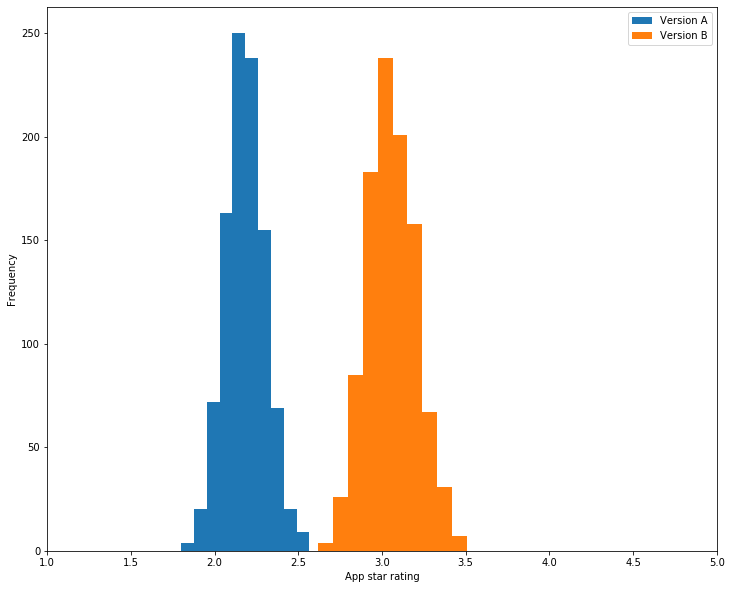

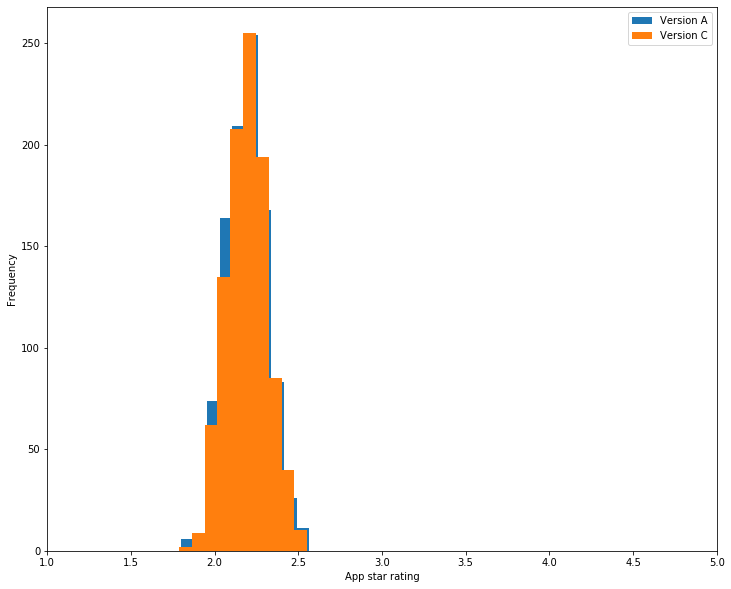

In [37]:
## This code just plots a histogram of the values of the results
## If the curves overlap a lot, then the difference probably
## Note: you don't need to understand this code
## It is just to display the results in a clear form

import matplotlib.pyplot as plt
%matplotlib inline

### Plot A versus B

## plot histograms
plt.figure(figsize=(12,10))
plt.hist(bootstrap(A,1000), bins=10)
plt.hist(bootstrap(B,1000), bins=10)
plt.xlim(1,5)

## data scientists always label their graphs!
plt.xlabel("App star rating")
plt.ylabel("Frequency")
plt.legend(["Version A", "Version B"])

### Plot A versus C
plt.figure(figsize=(12,10))

## plot histograms
plt.hist(bootstrap(A,1000), bins=10)
plt.hist(bootstrap(C,1000), bins=10)
plt.xlim(1,5)

## data scientists always label their graphs!
plt.xlabel("App star rating")
plt.ylabel("Frequency")
plt.legend(["Version A", "Version C"])


**If you managed this: Great! Now you have some pretty graphs show the venture capitalists and get another funding round sorted out :)**

---------

## C: Extended problems (OPTIONAL)
These *extended* problems are optional for students who are keen to learn more. If you've finished the whole lab and want to explore these ideas in more depth, these problems and resources are intended to help you do that. 

## <font color="red"> You do not need to make any attempt at any of this section to receive a tick! </font>


## Further questions on the bootstrap
For problem B.3:

* Try plotting the histogram of the  original app ratings (e.g. with `plt.hist(A, bins=10)`). Why is this not very helpful, whereas the bootstrap result is easy to interpret? 

* What happens if the bootstrap value is very small (e.g. bootstrap(A,2))? 
* Or very large?

## Larger C problems
These will take 30-60 minutes each.

## C.1 Permuations

Using **recursion** write a function that will generate all permutations of a given list, in order, and returns them as a list of lists.

For example `permutations([1,2,3])` should generate and return:

    [[1,2,3], [1, 3, 2], [2, 1, 3], [2, 3, 1], [3, 1, 2], [3, 2, 1]]
    
    

In [38]:
# Solution goes here
def permutations(l):
    return None

In [39]:
with tick():
    assert permutations([]) == [[]]
    assert permutations([1]) == [[1]]
    assert permutations([[]]) == [[[]]]
    assert permutations([1, 2]) == [[1, 2], [2, 1]]
    assert permutations([1, 2, 3]) == [
        [1, 2, 3],
        [1, 3, 2],
        [2, 1, 3],
        [2, 3, 1],
        [3, 1, 2],
        [3, 2, 1],
    ]
    assert permutations([3, 2, 1]) == [
        [3, 2, 1],
        [3, 1, 2],
        [2, 3, 1],
        [2, 1, 3],
        [1, 3, 2],
        [1, 2, 3],
    ]
    assert permutations("actg") == [
        ["a", "c", "t", "g"],
        ["a", "c", "g", "t"],
        ["a", "t", "c", "g"],
        ["a", "t", "g", "c"],
        ["a", "g", "c", "t"],
        ["a", "g", "t", "c"],
        ["c", "a", "t", "g"],
        ["c", "a", "g", "t"],
        ["c", "t", "a", "g"],
        ["c", "t", "g", "a"],
        ["c", "g", "a", "t"],
        ["c", "g", "t", "a"],
        ["t", "a", "c", "g"],
        ["t", "a", "g", "c"],
        ["t", "c", "a", "g"],
        ["t", "c", "g", "a"],
        ["t", "g", "a", "c"],
        ["t", "g", "c", "a"],
        ["g", "a", "c", "t"],
        ["g", "a", "t", "c"],
        ["g", "c", "a", "t"],
        ["g", "c", "t", "a"],
        ["g", "t", "a", "c"],
        ["g", "t", "c", "a"],
    ]

AssertionError: 

    

### C.2 Function lists
You can put anything that you can put in a variable in a Python list. This includes functions. 

For example, imagine you had to build a little command set to drive a robot. But the robot's remote control unit can only send a numerical code for each function to be executed (e.g. 0=go forward, 1=turn left). 

If you put functions that did these operations in a list you can just index them and call them:

In [ ]:
def forward():
    print("forward")
    
def left():
    print("left")
    
def right():    
    print("right")
    
    
# note that there is no following () after the functions
# so they are not called, but instead a reference to them is put in the list
fn_list = [forward, left, right]

# this takes the first element of fn_list, then calls it using ()
fn_list[0]()

fn_list[1]()
fn_list[0]()
fn_list[0]()
fn_list[2]()

### Task
Write a set of functions for the following commands, for a robot moving in 2D space (x and y) and put them in a list so that we have:

    0: move forward by 1 unit, drawing a line from the previous position to the new one
    1: turn left; make the new direction 60 degrees left of the previous
    2: turn right; make the new direction 60 degrees right of the previous
    3: remember; remember where we are and where we are facing;
    4: return; return to the last place we remembered and remove it from the remembered list.
    
To do this, you will need to store where the robot currently is in 2D (hint: a list consisting of an x and y co-ordinate) and what way the robot is facing. Start with the robot facing upwards at position (0,0). Use a vector (dx,dy) to represent the direction the robot faces.

You will also need to keep a list of places that have been remembered (and the direction the robot was facing) by command 3, and be able to return to them with command 4. Command 4 should also remove the remembered location from the list of  remembered locations (hint: how could you use `del` to do this?).

Write a function `simulate()` to apply these commands to a list of numbers 0-4 and simulate the robot's movement.

### Tips

The command `line(ox,oy,x,y)` defined below will draw a line from (ox,oy) to (x,y).  The function `rotate()` to rotate a direction vector by a given angle is provided for you.


        

In [43]:
import math

def rotate(dx, dy, angle=60):
    """Takes a direction dx,dy and returns a new direction (dx_new, dy_new)
    which is rotated by the given number of degrees"""
    rad_angle = math.radians(angle)
    dx_new = dx  * math.cos(rad_angle) + dy * math.sin(rad_angle)
    dy_new = -dx * math.sin(rad_angle) + dy * math.cos(rad_angle)
    return dx_new, dy_new

In [44]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
def line(ox,oy,x,y):    
    plt.plot([ox,x], [oy,y], 'k')
    plt.plot([ox], [oy], 'ko')
    plt.plot([x], [y], 'ro')
    plt.xlim(-10,10)
    plt.ylim(-10,10)
    plt.axis("off")

In [49]:
# Solution goes here
import math
current_pos=[0,0]
current_facing=[0,0] #vector (dx,dy)
remembered_places=[]

#0: move forward by 1 unit, drawing a line from the previous position to the new one  
def forward():  
    global current_pos
    x,y=current_pos[0],current_pos[1]
    global current_facing
    dx,dy=current_facing[0],current_facing[1]
    new_x=math.sqrt(1-dy**2)
    new_y=math.sqrt(1-dx**2)
    line(x,y,new_x,new_y)
    current_pos=[new_x,new_y]

#1: turn left; make the new direction 60 degrees left of the previous
def turn_left():
    global current_facing
    dx,dy=current_facing[0],current_facing[1]    
    length = math.sqrt(dx**2+dy**2)
    current_facing=[length*(1/2*dx-math.sqrt(3)*dy),length*(math.sqrt(3)*dx+1/2*dy)]

#2: turn right; make the new direction 60 degrees right of the previous   
def turn_right():
    global current_facing
    dx,dy=current_facing[0],current_facing[1] 
    length = math.sqrt(dx**2+dy**2)
    current_facing=[length*(1/2*dx+math.sqrt(3)*dy),length*(math.sqrt(3)*dx-1/2*dy)]
    
#3: remember; remember where we are and where we are facing;
def remember():
    global remembered_places
    remembered_places.append([current_pos[0],current_pos[1],current_facing[0],current_facing[1]])

#4: return; return to the last place we remembered and remove it from the remembered list.
def return_and_remove():
    last_place = remembered_places[-1]
    del remembered_places[-1]
    return last_place

fn_list = [forward, turn_left, turn_right, remember, return_and_remove]

def simulate(l):
    for fn_n in l:
        fn_list[fn_n]()


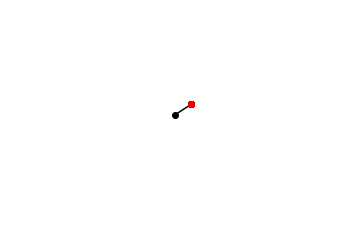

In [50]:
## Test
## should be a kind of bird shape
simulate([0,0,0,3,2,0,0,2,0,4,3,1,0,0,1,0,4,0,0])

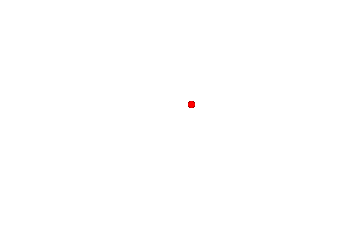

In [51]:
# a hexagon
simulate([0,1,0,1,0,1,0,1,0,1,0,1])

## C.3 Matrices
Matrices are 2D arrays (rectangular arrays) of values and have lots of useful mathematical properties. You can represent these with nested lists:

    [[1, 2, 3, 4],
     [4, 5, 6, 7],
     [0, 0, 0, 1]]
     
This is a 3x4 matrix  (3 rows, 4 columns). Each row always has the same number of columns. 
### Task
We need to be able to do some basic mathematical operations on these matrices. Your problem is to write these functions. *All functions should return new matrices and not change the ones they are passed.*
* `pretty_print(m)` should print out each element of m as a neat matrix. E.g. it should print [[1,2,3], [4,5,6]] as:
        1  2  3
        4  5  6

Note for this that you can use a special formatting syntax to make the numbers line up:

       print "% 5d" % n
   
will print an integer number with enough leading spaces to make it 5 characters long. "% 5d" means "substitute [space character fill]  [to 5 characters]  \<integer\>"

* `add_scalar(m, a)` should add the number `a` to each element of matrix `m`
* `mul_scalar(m, a)` should multiply each element of matrix `m` by the number `a`.
* `add_matrix(m1, m2)` should add two matrices together. The matrices **must be the same size** for this to work.
* `fill(rows, cols, n)` should create a new matrix with size `rows x cols` and fill each element with the number `n`.
* `hstack(m1, m2)` should join matrices m1 and m2, so that m2 is to the *right* of m2. m1 and m2 must have the same number of *rows*. For example:    

         [[1 2]     [[0 8 9]
         [3 4]]      [9 1 4]]

will become:

         [[1 2 0 8 9]
         [3 4 9 1 4]]
         
<font color="red"> Note that I've omitted the commas for clarity here, you still need to put them in the code! </font>         

* `vstack(m1, m2)` should join matrices m1 and m2, so that m2 is to the *bottom* of m2. m1 and m2 must have the same number of *columns*.

* `transpose(m1)` (*trickier*). **Transposing** a matrix means exchanging the rows and columns. For example:
  
      [[1 2 3]
       [4 5 6]
       [7 8 9]]
    
will become:

      [[1 4 7]
       [2 5 8]
       [3 6 9]]

* `mul_matrix(m1, m2)` (*trickier*) should add multiply two matrices together using **matrix multiplication**. The matrix multiplication rule is given [here](https://www.mathsisfun.com/algebra/matrix-multiplying.html) if you don't know it.


#### Caveats
Nested lists aren't a very efficient way to represent or use lists; real matrix use will normally use specialised data structures to do operations extremely quickly.

In [ ]:
# Solution goes here

In [ ]:
## Tests
## All of the following should work correctly
a = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
pretty_print(a)
pretty_print(add_scalar(a, 1))
pretty_print(mul_scalar(a, 2))
pretty_print(fill(3, 4, 0))
pretty_print(hstack(a, fill(3, 4, 0)))
pretty_print(vstack(a, fill(4, 3, 0)))
pretty_print(transpose(a))
b = [[0, 0, 0, 0], [1, 1, 1, 0], [2, 2, 2, 0]]
pretty_print(b)
pretty_print(transpose(b))
pretty_print(mul_matrix(a, b))
pretty_print(mul_matrix(a, [[1, 0, 1]]))